(453, 361)
[[[190 179 157]
  [192 181 159]
  [194 183 161]
  ...
  [ 37  38  40]
  [ 14  15  17]
  [ 23  24  26]]

 [[196 185 163]
  [194 183 161]
  [192 181 159]
  ...
  [ 19  20  22]
  [ 25  26  28]
  [ 28  29  31]]

 [[198 187 165]
  [196 185 163]
  [191 180 158]
  ...
  [ 27  28  30]
  [ 19  20  22]
  [ 19  20  22]]

 ...

 [[241 212 154]
  [239 210 152]
  [247 218 160]
  ...
  [200 161  96]
  [214 175 110]
  [204 165 100]]

 [[233 204 146]
  [231 202 144]
  [243 214 156]
  ...
  [213 174 109]
  [204 165 100]
  [209 170 105]]

 [[222 193 135]
  [222 193 135]
  [224 195 137]
  ...
  [209 170 105]
  [215 176 111]
  [206 167 102]]]


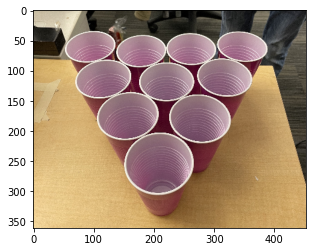

In [18]:
# import argparse
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('IMG_3921.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
scale_percent = 15 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized = cv2.resize(img, dim)
print(dim)
print(img)

plt.imshow(resized)

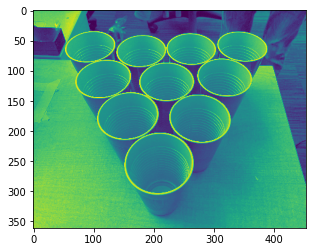

In [9]:
img1 = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
plt.imshow(img1)

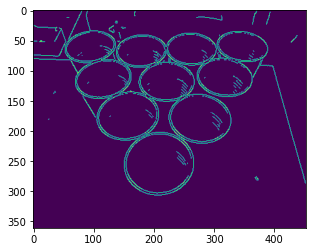

In [19]:
edges = cv2.Canny(image=resized, threshold1=300, threshold2=400, apertureSize=3)
# edges = cv2.Sobel(image=img, )
# print(edges)
plt.imshow(edges)
# cv2.imshow('edges', edges)

[[[211.5 248.5  57. ]
  [275.5 174.5  46.1]
  [148.5 175.5  40.7]
  [220.5 133.5  46.3]
  [306.5 112.5  35.8]
  [105.5 113.5  33.8]
  [121.5  69.5  15.8]
  [281.5  67.5  23.4]]]
test [212 248  57]
test [276 174  46]
test [148 176  41]
test [220 134  46]
test [306 112  36]
test [106 114  34]
test [122  70  16]
test [282  68  23]


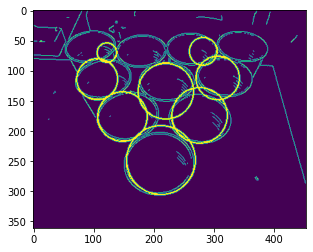

In [35]:
# Modified from https://stackoverflow.com/questions/60637120/detect-circles-in-opencv
minDist = 40
param1 = 30 #500
param2 = 30 #200 #smaller value-> more false circles
minRadius = 5
maxRadius = 100 #10

circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)
print(circles)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        print("test", i)
        cv2.circle(edges, (i[0], i[1]), i[2], (255, 255, 255), 2)

plt.imshow(edges)

owo
detected
Key-pointed
(< cv2.KeyPoint 0x7f8f3b1d9990>, < cv2.KeyPoint 0x7f8f08d46a50>, < cv2.KeyPoint 0x7f8f088679c0>, < cv2.KeyPoint 0x7f8f08d40060>, < cv2.KeyPoint 0x7f8f08d42ab0>, < cv2.KeyPoint 0x7f8f18b52d50>, < cv2.KeyPoint 0x7f8f08c580c0>, < cv2.KeyPoint 0x7f8f08c58cc0>, < cv2.KeyPoint 0x7f8f08c58930>, < cv2.KeyPoint 0x7f8f08c51780>)


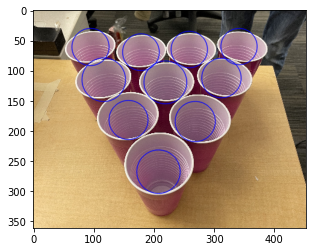

In [21]:
print("owo")
# Set up the detector with default parameters.
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 300


# Filter by Area.
params.filterByArea = True
params.minArea = 1500

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.05

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01
detector = cv2.SimpleBlobDetector_create(params)
print("detected")
# Detect blobs.
keypoints = detector.detect(resized)
print("Key-pointed")
print(keypoints)
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(resized, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(im_with_keypoints)

# keypoints: 154
(< cv2.KeyPoint 0x7fa7b9297570>, < cv2.KeyPoint 0x7fa7b9297360>, < cv2.KeyPoint 0x7fa7da313690>, < cv2.KeyPoint 0x7fa7b9283d50>, < cv2.KeyPoint 0x7fa7b9283e70>, < cv2.KeyPoint 0x7fa7b9283c60>, < cv2.KeyPoint 0x7fa7b9283ed0>, < cv2.KeyPoint 0x7fa7dc14c1e0>, < cv2.KeyPoint 0x7fa7dc14cab0>, < cv2.KeyPoint 0x7fa789e36d50>, < cv2.KeyPoint 0x7fa789e36c00>, < cv2.KeyPoint 0x7fa789e36ae0>, < cv2.KeyPoint 0x7fa789e36b10>, < cv2.KeyPoint 0x7fa789e36c60>, < cv2.KeyPoint 0x7fa789dfbcf0>, < cv2.KeyPoint 0x7fa789dfbc00>, < cv2.KeyPoint 0x7fa789dfbe10>, < cv2.KeyPoint 0x7fa7da615630>, < cv2.KeyPoint 0x7fa7da6155d0>, < cv2.KeyPoint 0x7fa7da6152d0>, < cv2.KeyPoint 0x7fa7da615570>, < cv2.KeyPoint 0x7fa7da615690>, < cv2.KeyPoint 0x7fa7da615600>, < cv2.KeyPoint 0x7fa7da6155a0>, < cv2.KeyPoint 0x7fa7da615660>, < cv2.KeyPoint 0x7fa7da6156c0>, < cv2.KeyPoint 0x7fa7da6156f0>, < cv2.KeyPoint 0x7fa7da615720>, < cv2.KeyPoint 0x7fa7da615750>, < cv2.KeyPoint 0x7fa7da615780>, < cv2.KeyPoint 0x7fa7d

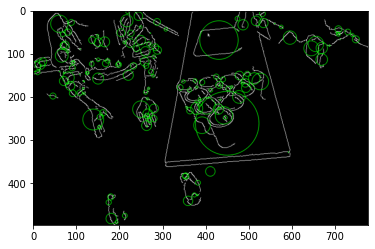

In [74]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img_2 = cv2.imread('image-3.png')
scale_percent = 50 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
img_2 = cv2.resize(img_2, dim)
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 0
params.maxThreshold = 10000

# Filter by Area.
params.filterByArea = True
params.minArea = 0

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.00

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.0

# Filter by Inertia
# params.filterByInertia = True
params.minInertiaRatio = 0.00
detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(img_2)
print("# keypoints:", len(keypoints))
print(keypoints)
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(img_2, keypoints, np.array([]), (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(im_with_keypoints)

<class 'numpy.ndarray'> (497, 777)
[[[230.5  36.5  27.2]
  [252.5  84.5  19.4]
  [491.5 187.5  25.8]]]
test [230  36  27]
test [252  84  19]
test [492 188  26]


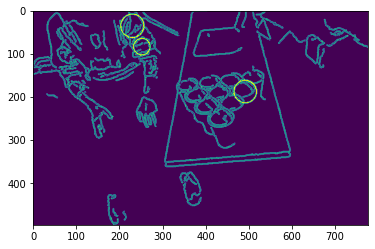

In [6]:
# import argparse
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('image-3.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
scale_percent = 50 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized = cv2.resize(img, dim)
# print(dim)
# print(img)
# print(img.type())
plt.imshow(resized)
edges = cv2.Canny(image=resized, threshold1=10, threshold2=100)
plt.imshow(edges)
print(type(edges), edges.shape)

# # Modified from https://stackoverflow.com/questions/60637120/detect-circles-in-opencv
minDist = 30
param1 = 30 #500
param2 = 30 #200 #smaller value-> more false circles
minRadius = 5
maxRadius = 40 #10

circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)
print(circles)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        print("test", i)
        cv2.circle(edges, (i[0], i[1]), i[2], (255, 255, 255), 2)

plt.imshow(edges, )

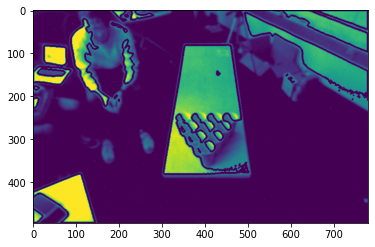

In [94]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('image-5.png')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
scale_percent = 50 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized = cv2.resize(imgray, dim)
# print(dim)
# print(img)
# print(img.type())
plt.imshow(resized)
ret, thresh = cv2.threshold(resized, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(resized, contours, -1, (0,255,0), 3)
plt.imshow(resized)
# edges = cv2.Canny(image=resized, threshold1=10, threshold2=100)
# plt.imshow(edges)

<class 'numpy.ndarray'> (575, 180)
6
test [ 82 506  27]
test [ 66 402  24]
test [ 62 470  25]
test [ 46 438  20]
test [130 436  16]
test [ 26 402  15]


True

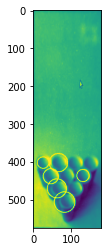

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('image-5.png')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(imgray)

dist_height = 575.0 # measured: 550
dist_width = 180.0
pts_src = np.array([[703.0, 163.0], [924.0,161.0], [606.0,763.0],[1010.0,761.0]])
pts_dst = np.array([[0.0, 0.0], [dist_width,0.0], [0.0,dist_height],[dist_width, dist_height]])

#---- forming the black image of specific size
# im_dst = np.zeros((180, 550), np.uint8)

#---- Framing the homography matrix
h, status = cv2.findHomography(pts_src, pts_dst)
 
#---- transforming the image bound in the rectangle to straighten
im_out = cv2.warpPerspective(imgray, h, (int(dist_width),int(dist_height)))
cv2.imwrite("im_out.jpg", im_out)
plt.imshow(im_out)
print(type(im_out), im_out.shape)
# # Modified from https://stackoverflow.com/questions/60637120/detect-circles-in-opencv
minDist = 15
param1 = 30 #500
param2 = 30 #200 #smaller value-> more false circles
minRadius = 10
maxRadius = 30 #10

circles = cv2.HoughCircles(im_out, cv2.HOUGH_GRADIENT, 1, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)
print(len(circles[0,:]))
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        print("test", i)
        cv2.circle(im_out, (i[0], i[1]), i[2], (255, 255, 255), 2)

plt.imshow(im_out)
cv2.imwrite("im_out_circles.jpg", im_out)

In [10]:
# Continued from above
table_offset = 36 # in inches
pixels_pr_inch = 10 # 18 inches x 55 inches
for circ in circles[0,:]:
    pos = (circ[0], circ[1])
    # print((dist_width/2),pos[0])
    real_pos = ((pos[0] - (dist_width/2))/pixels_pr_inch,(dist_height - pos[1])/pixels_pr_inch + table_offset)
    print(real_pos)

(-0.8, 6.9)
(-2.4, 17.3)
(-2.8, 10.5)
(-4.4, 13.7)
(4.0, 13.9)
(-6.4, 17.3)
